(307, 15)
        Date      Open      High       Low     Close  High_Last_7_Days  \
0 2024-01-01  42283.58  44184.10  42180.77  44179.55          44946.91   
1 2024-01-02  44179.55  45879.63  44148.34  44946.91          44946.91   
2 2024-01-03  44946.91  45500.00  40750.00  42845.23          44946.91   
3 2024-01-04  42845.23  44729.58  42613.77  44151.10          44946.91   
4 2024-01-05  44151.10  44357.46  42450.00  44145.11          44946.91   

   %_Diff_From_High_Last_7_Days  Low_Last_7_Days  %_Diff_From_Low_Last_7_Days  \
0                     -1.707259         42845.23                     3.114279   
1                      0.000000         42845.23                     4.905284   
2                     -4.675917         42845.23                     0.000000   
3                     -1.770556         42845.23                     3.047877   
4                     -1.783882         42845.23                     3.033897   

   Days_Since_High  Days_Since_Low  High_Next_5_Days  Low_

C:\Users\diyas\AppData\Local\Temp\ipykernel_24356\1102900631.py:15: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  Nulls = pd.concat([train.isnull().sum()],axis = 1,keys='Train')


High Prediction MSE: 1.8595702065820634
High Prediction R2: 0.8722963129279921
Low Prediction MSE: 1.055850557417077
Low Prediction R2: 0.9519124865750488


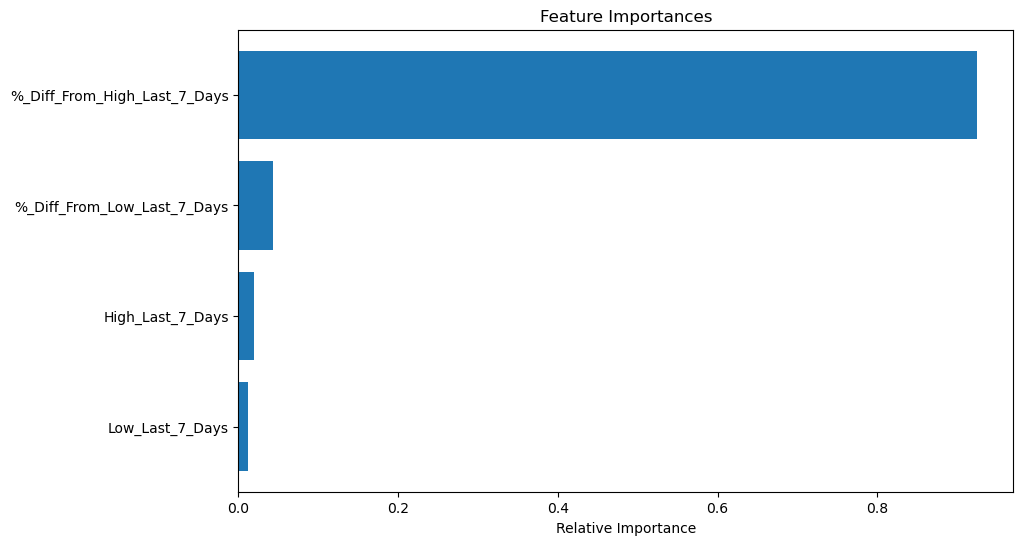

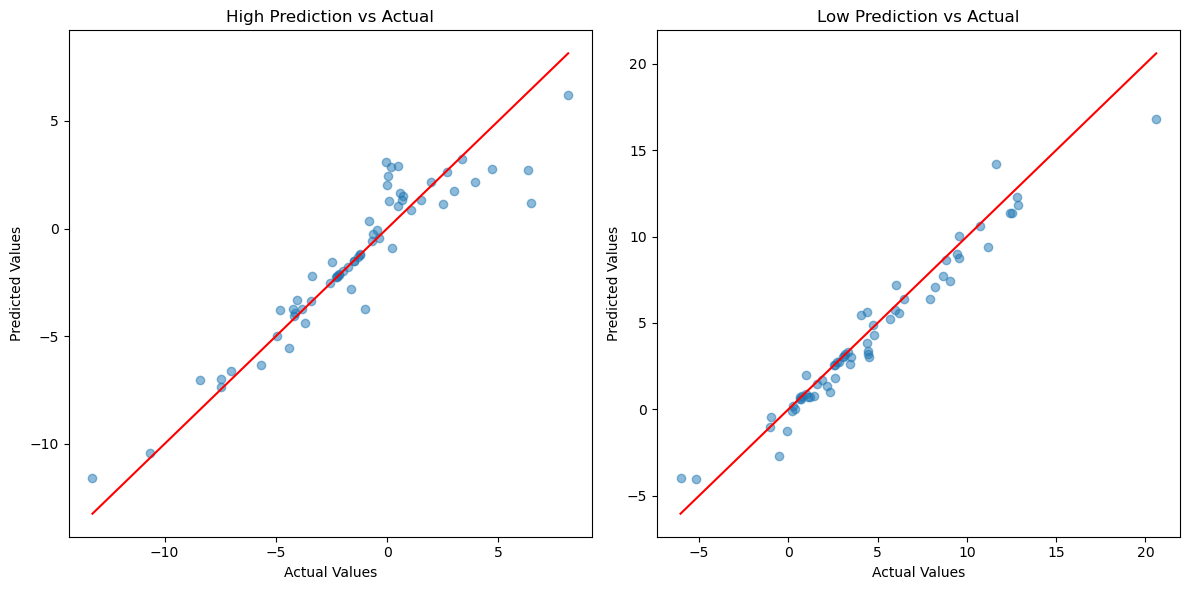

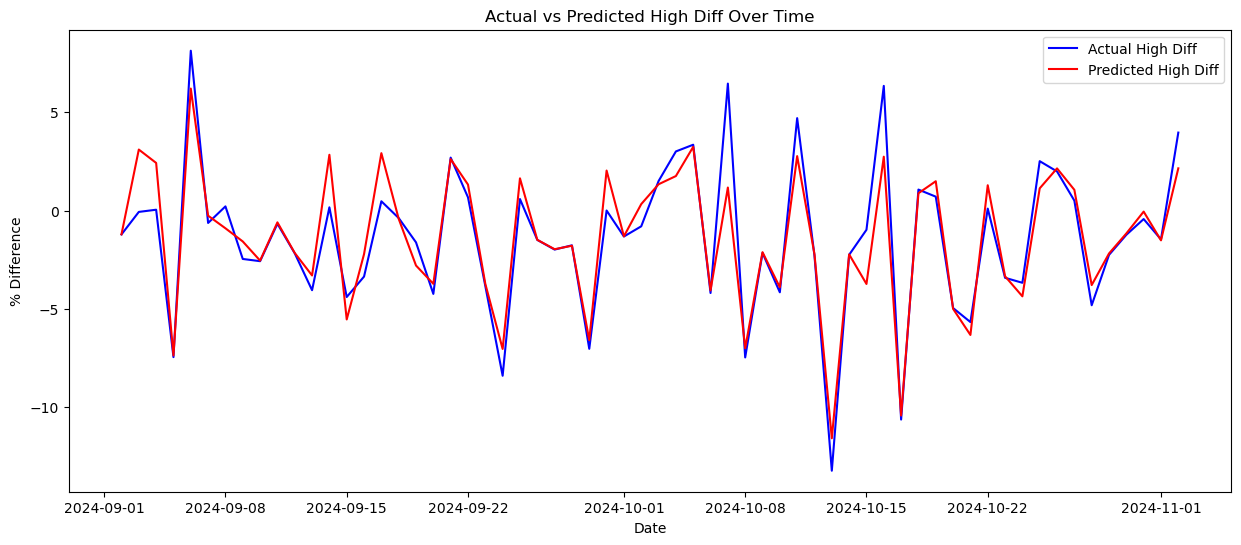

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

train = pd.read_excel(r"Output_crypto.xlsx ")
print(train.shape)

print(train.head(5))

#Checking for null values in every column
Nulls = pd.concat([train.isnull().sum()],axis = 1,keys='Train')
print(Nulls)

# Features and targets
#Days_Since_High_Last_7_Days = High_Last_7_Days and Days_Since_Low_Last_7_Days = Low_Last_7_Days
X = train[['High_Last_7_Days', '%_Diff_From_High_Last_7_Days', 'Low_Last_7_Days', '%_Diff_From_Low_Last_7_Days']]
y_high = train['%_Diff_From_High_Next_5_Days']
y_low = train['%_Diff_From_Low_Next_5_Days']

# Split data into training and testing sets
X_train, X_test, y_high_train, y_high_test, y_low_train, y_low_test = train_test_split(X, y_high, y_low, test_size=0.2, random_state=42)

# Train the Random Forest model
model_high = RandomForestRegressor(n_estimators=100, random_state=42)
model_high.fit(X_train, y_high_train)

model_low = RandomForestRegressor(n_estimators=100, random_state=42)
model_low.fit(X_train, y_low_train)

# Predict and evaluate
y_high_pred = model_high.predict(X_test)
y_low_pred = model_low.predict(X_test)

print("High Prediction MSE:", mean_squared_error(y_high_test, y_high_pred))
print("High Prediction R2:", r2_score(y_high_test, y_high_pred))

print("Low Prediction MSE:", mean_squared_error(y_low_test, y_low_pred))
print("Low Prediction R2:", r2_score(y_low_test, y_low_pred))

'''Results : High Prediction MSE: 2.0770569037427093
High Prediction R2: 0.8520673740582533
Low Prediction MSE: 1.2233847776738007
Low Prediction R2: 0.9425372798847088 '''



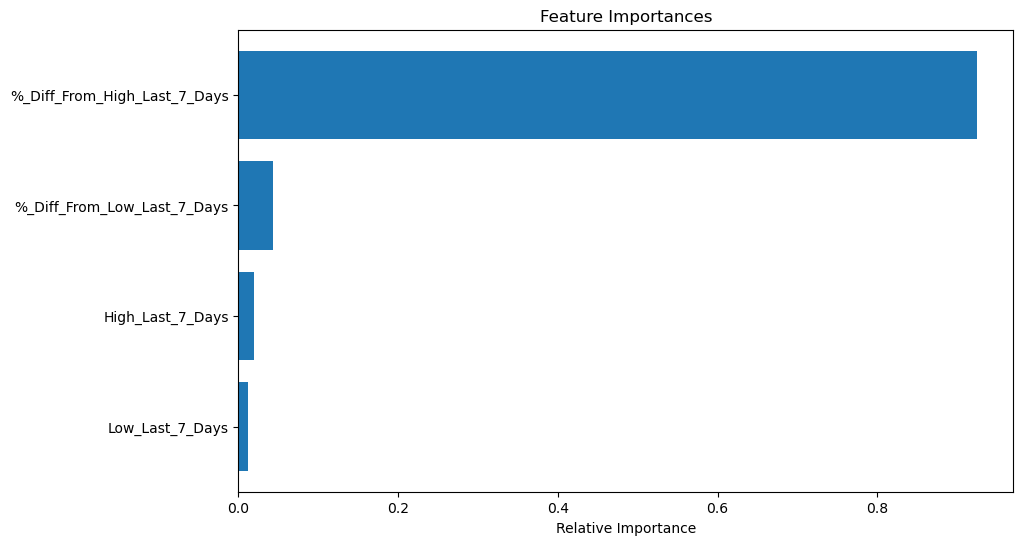

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [2]:
#visualizations
feature_importances = model_high.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

plt.figure(figsize=(12, 6))

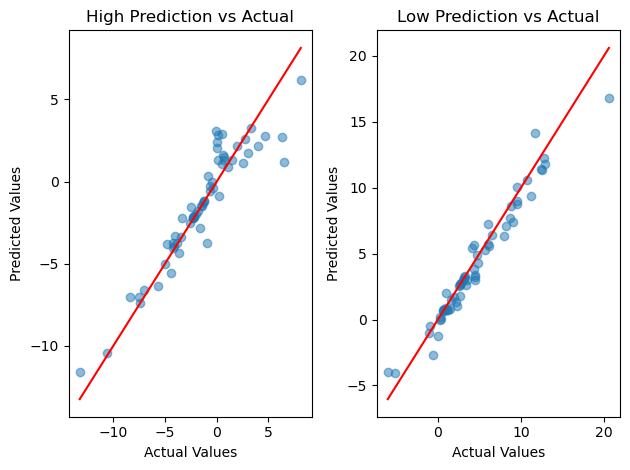

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [3]:
# High Predictions
plt.subplot(1, 2, 1)
plt.scatter(y_high_test, y_high_pred, alpha=0.5)
plt.plot([min(y_high_test), max(y_high_test)], [min(y_high_test), max(y_high_test)], color='red')
plt.title('High Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Low Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_low_test, y_low_pred, alpha=0.5)
plt.plot([min(y_low_test), max(y_low_test)], [min(y_low_test), max(y_low_test)], color='red')
plt.title('Low Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))


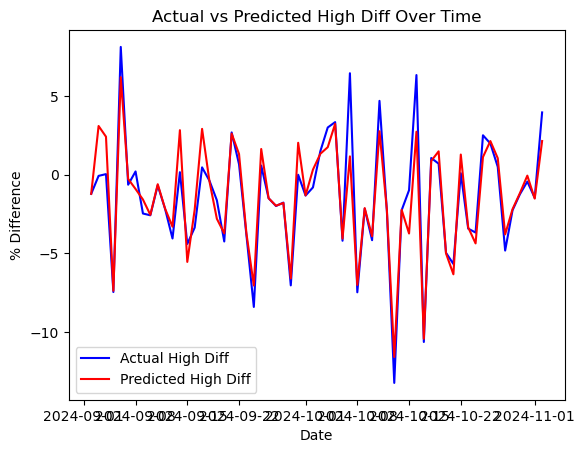

In [4]:
# Plot actual vs predicted for high difference
plt.plot(train['Date'][-len(y_high_test):], y_high_test, label='Actual High Diff', color='blue')
plt.plot(train['Date'][-len(y_high_test):], y_high_pred, label='Predicted High Diff', color='red')
plt.title('Actual vs Predicted High Diff Over Time')
plt.xlabel('Date')
plt.ylabel('% Difference')
plt.legend()
plt.show()